In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
landslides = pd.read_csv("landslide_catalog.csv")

In [31]:
landslides = landslides[['latitude', 'longitude', 'country_na']]
print(len(landslides))
landslides.head()

13493


,latitude,longitude,country_na
0,23.717019,91.615772,India
1,26.071735,98.531053,Myanmar
2,47.714502,7.129721,France
3,-45.879569,170.551640,New Zealand
4,11.468510,75.943400,India


In [41]:
landslides.country_na.value_counts()

United States           3763
India                   1567
Myanmar                 1118
Philippines              743
Nepal                    568
                        ... 
United Arab Emirates       1
Sudan                      1
Greenland                  1
Albania                    1
Burkina Faso               1
Name: country_na, Length: 153, dtype: int64

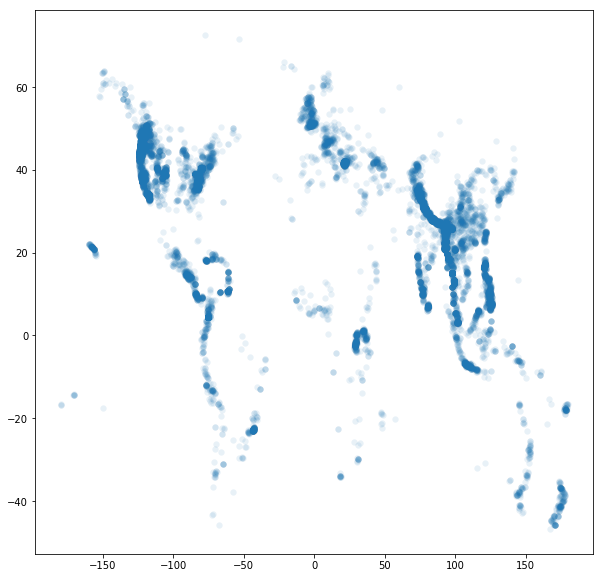

In [69]:
plt.figure(figsize=(10, 10))
plt.scatter(x=landslides['longitude'], y=landslides['latitude'], alpha=0.1, linewidths=0.1)
plt.show()